In [1]:
#All neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn==0.11.0
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.utils.class_weight import compute_sample_weight
import pickle
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [12,8]

In [4]:
#import dataset
df_org = pd.read_csv(r"C:\Users\HP\Desktop\MSc Project\Vamshi_pro\loan_default_prediction\Data\Loan_train.csv")
df_org["Risk_Flag"] = df_org["Risk_Flag"].astype(dtype='int')
df_org.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_owned,House_rented
0,1303834,23,3,1,0,0,0,0,3,13,0,0,1
1,7574516,40,10,1,0,1,1,1,9,13,0,0,1
2,3991815,66,4,0,0,2,2,2,4,10,0,0,1
3,6256451,41,2,1,1,1,3,3,2,12,1,0,1
4,5768871,47,11,1,0,3,4,4,3,14,1,0,1


In [5]:
#data shape check
df_org.shape

(252000, 13)

In [6]:
#seperate target from data
X = df_org.drop("Risk_Flag",axis=1)
y = df_org["Risk_Flag"]
print("X shape :- ",X.shape)
print("y shape :- ",y.shape)

X shape :-  (252000, 12)
y shape :-  (252000,)


<AxesSubplot:title={'center':'HeatMap'}>

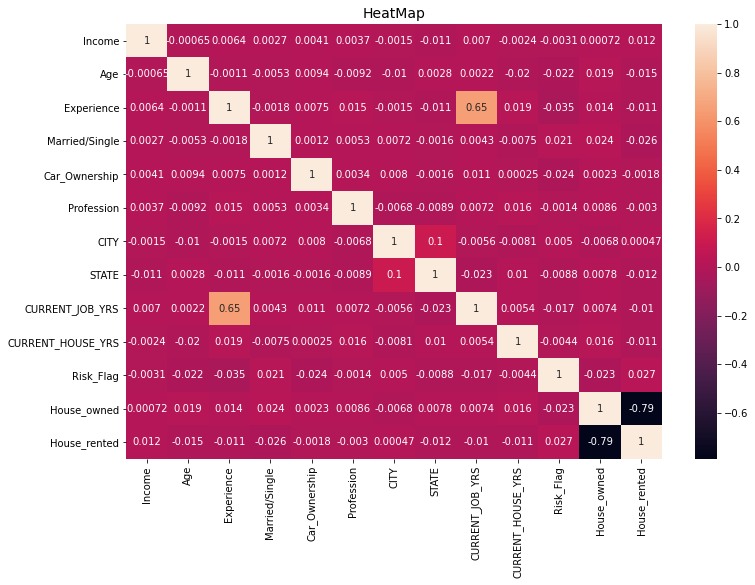

In [7]:
#Heat map
font_dict = {"fontsize":14}
ht_map = sns.heatmap(df_org.corr(),annot=True)
plt.title("HeatMap",fontdict=font_dict)
ht_map

In [8]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
#check shapes of X_train,X_test,y_train and y_test
print("X_train shape :- ",X_train.shape)
print("y_train shape :- ",y_train.shape)
print("X_test shape :- ",X_test.shape)
print("y_test shape :- ",y_test.shape)

X_train shape :-  (168840, 12)
y_train shape :-  (168840,)
X_test shape :-  (83160, 12)
y_test shape :-  (83160,)


In [148]:
#function to plot roc_auc curve
def plot_roc_auc_curve(false_positive_rate,true_positive_rate):
    plt.plot(false_positive_rate,true_positive_rate,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.title("ROC-curve")
    plt.xlabel("false_positive_rate")
    plt.ylabel("true_positive_rate")
    plt.show()

### LogisticRegression

In [8]:
#Logistic Regressor
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_xtrain_pred = lr_model.predict(X_train)
lr_xtest_pred = lr_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,lr_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,lr_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,lr_xtest_pred))

accuracy on Xtrain :-  87.66
accuracy on Xtest :-  87.78

Confusion matrix
[[72999     0]
 [10161     0]]


logistic regression auc score :-  50.0


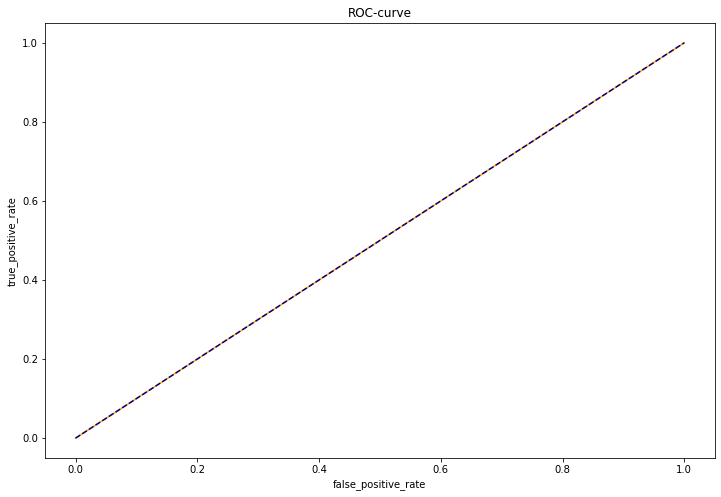

In [10]:
#Logistic regression roc curve and auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,lr_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("logistic regression auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

Looks like Logistic regression model could not learn any patterns from data, as auc score is 0.5.

### Decision Tree

In [11]:
#Decision tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
dt_xtrain_pred = dt_model.predict(X_train)
dt_xtest_pred = dt_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,dt_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,dt_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,dt_xtest_pred))

accuracy on Xtrain :-  93.76
accuracy on Xtest :-  88.11

Confusion matrix
[[67333  5666]
 [ 4224  5937]]


Decision tree classifier auc score :-  75.33376914744976


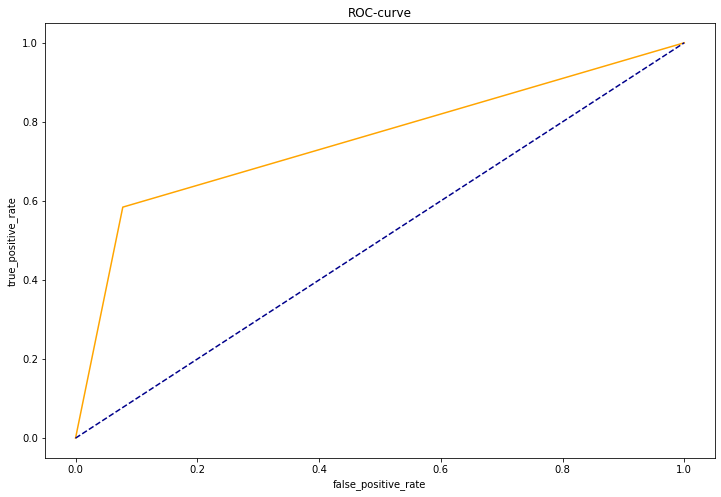

In [12]:
#Decision tree roc and auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,dt_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Decision tree classifier auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

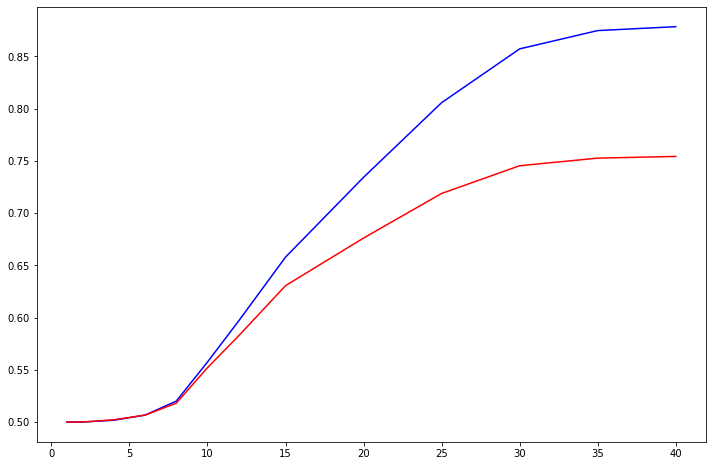

In [13]:
#Tuning max_depth of DT
max_depth = [1,2,4,6,8,10,12,15,20,25,30,35,40]
train_results = []
test_results = []
for x in max_depth:
    dt_model = DecisionTreeClassifier(max_depth=x,random_state=0)
    dt_model.fit(X_train,y_train)
    dt_xtrain_pred = dt_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,dt_xtrain_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    dt_xtest_pred = dt_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,dt_xtest_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
plt.plot(max_depth,train_results,"b")
plt.plot(max_depth,test_results,"r")
plt.show()

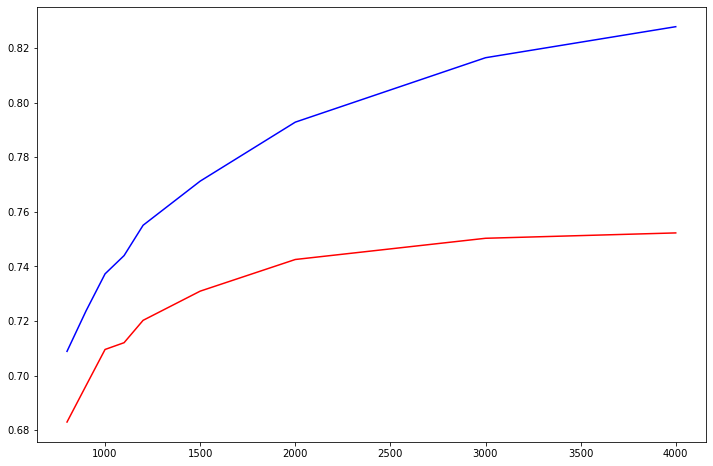

In [14]:
#Tuning max_leaf_nodes of DT
max_leaf_nodes = [800,900,1000,1100,1200,1500,2000,3000,4000]
train_results = []
test_results = []
for x in max_leaf_nodes:
    dt_model = DecisionTreeClassifier(max_depth=35,max_leaf_nodes=x,random_state=0)
    dt_model.fit(X_train,y_train)
    dt_xtrain_pred = dt_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,dt_xtrain_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    dt_xtest_pred = dt_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,dt_xtest_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
plt.plot(max_leaf_nodes,train_results,"b")
plt.plot(max_leaf_nodes,test_results,"r")
plt.show()

In [15]:
#Decision tree - tuning criterion
dt_params = {"criterion":["gini","entropy"]}
dt_model = DecisionTreeClassifier(max_depth=35,random_state=0)
grid = GridSearchCV(dt_model,param_grid=dt_params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy'}

accuracy on Xtrain :-  88.73
accuracy on Xtest :-  86.79

Confusion matrix
[[63698  9301]
 [ 1686  8475]]

Decision tree classifier auc score :-  85.33


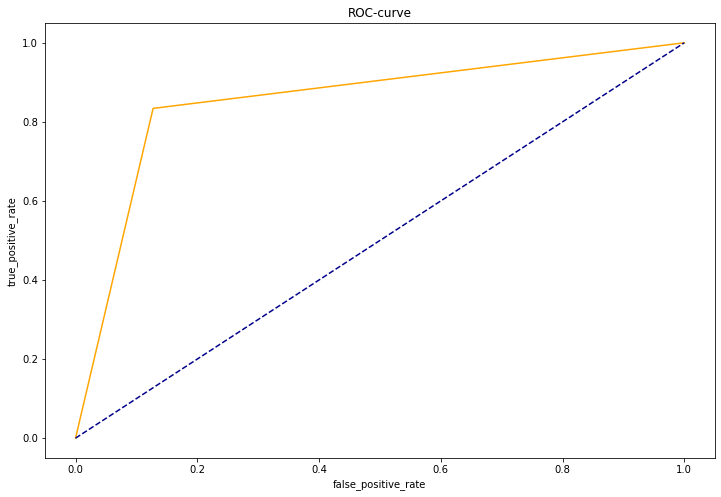

In [16]:
#Decsion tree with best params
class_weight = {0:0.2,1:0.8}
dt_model = DecisionTreeClassifier(max_depth=35,criterion="gini",max_leaf_nodes=2000,random_state=0,class_weight=class_weight)
dt_model.fit(X_train,y_train)
dt_xtrain_pred = dt_model.predict(X_train)
dt_xtest_pred = dt_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,dt_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,dt_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,dt_xtest_pred))
print("")
#Decision tree roc and auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,dt_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Decision tree classifier auc score :- ",round(roc_auc*100,2))
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

In [17]:
#Decision tree accuracy on test data
df_org_test = pd.read_csv("Loan_test")
dt_target_pred = pd.DataFrame()
dt_target_pred["Risk_Flag"] = dt_model.predict(df_org_test)
df_test_with_dt_pred = pd.concat([df_org_test,dt_target_pred],axis=1)
df_test_with_dt_pred.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_owned,House_rented,Risk_Flag
0,7393090,59,19,1,0,39,47,29,4,13,0,1,0
1,1215004,25,5,1,0,35,118,1,5,10,0,1,0
2,8901342,50,12,1,0,34,185,1,9,14,0,1,0
3,1944421,49,9,0,1,38,308,1,3,12,0,1,0
4,13429,25,18,1,1,20,78,29,13,11,0,1,0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'risk_flag label count')

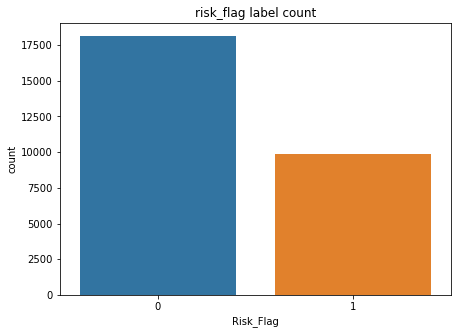

In [18]:
# Check the count of risk flag labels
plt.figure(figsize=(7,5))
sns.countplot(df_test_with_dt_pred["Risk_Flag"])
plt.title("risk_flag label count")

In [19]:
df_test_with_dt_pred.to_csv("Descion_tree_pred_testdata",index=False)

### RandomForest Classifier

In [20]:
#Random forest classifier
class_weights = {1:0.95,0:0.05}
rfl_model = RandomForestClassifier(random_state=0,class_weight=class_weights)
rfl_model.fit(X_train,y_train)
rfl_xtrain_pred = rfl_model.predict(X_train)
rfl_xtest_pred = rfl_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,rfl_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,rfl_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,rfl_xtest_pred))

accuracy on Xtrain :-  92.62
accuracy on Xtest :-  89.53

Confusion matrix
[[66638  6361]
 [ 2343  7818]]


Random forest classifier auc score :-  84.11371397142669


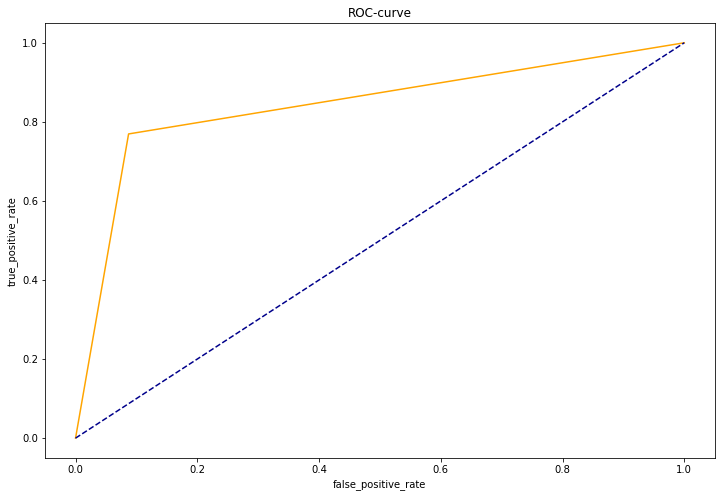

In [21]:
#Random forest classifier and auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Random forest classifier auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

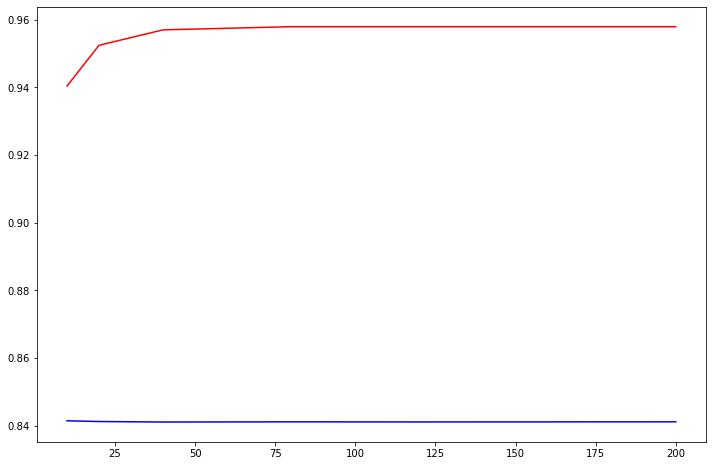

In [22]:
#RandomForest_classifier tunning for n_estimator
n_estimator = [10,20,40,80,120,160,200]
rfl_train_results = []
rfl_test_results = []
class_weights = {1:0.95,0:0.05}
for estimator in n_estimator:
    rfl_model = RandomForestClassifier(n_estimators=estimator,random_state=0,class_weight=class_weights,n_jobs=-1)
    rfl_model.fit(X_train,y_train)
    rfl_xtrain_pred = rfl_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,rfl_xtrain_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_train_results.append(auc_score)
    rfl_xtest_pred = rfl_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_test_results.append(auc_score)
plt.plot(n_estimator,rfl_train_results,color="r")
plt.plot(n_estimator,rfl_test_results,color="b")

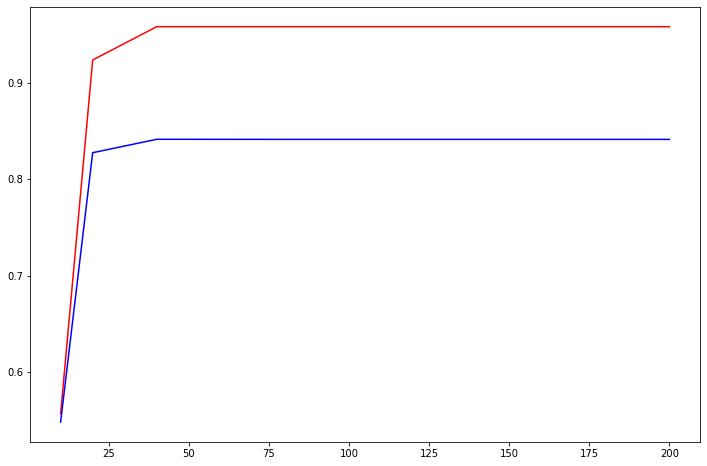

In [23]:
#RandomForest_classifier tunning
maxdepth = [10,20,40,80,120,160,200]
rfl_train_results = []
rfl_test_results = []
class_weights = {1:0.95,0:0.05}
for x in maxdepth:
    rfl_model = RandomForestClassifier(max_depth=x,random_state=0,class_weight=class_weights,n_jobs=-1)
    rfl_model.fit(X_train,y_train)
    rfl_xtrain_pred = rfl_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,rfl_xtrain_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_train_results.append(auc_score)
    rfl_xtest_pred = rfl_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_test_results.append(auc_score)
plt.plot(maxdepth,rfl_train_results,color="r")
plt.plot(maxdepth,rfl_test_results,color="b")

Text(0, 0.5, 'auc_score')

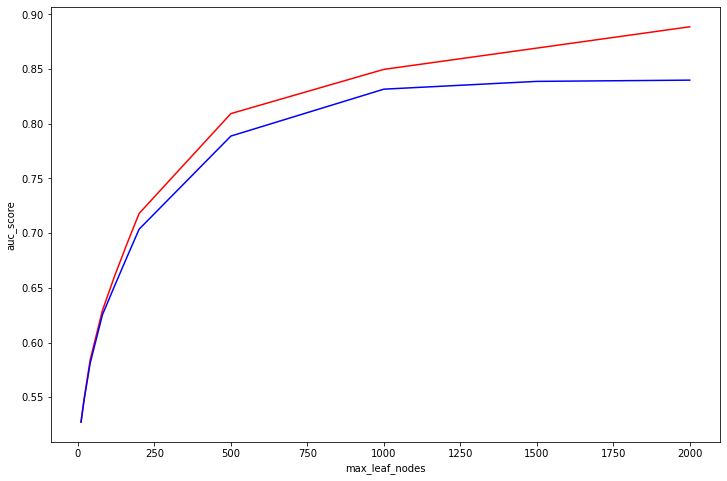

In [24]:
#RandomForest_classifier tunning for maxleafnodes
maxleafnodes = [10,20,40,80,120,160,200,500,1000,1500,2000]
rfl_train_results = []
rfl_test_results = []
class_weights = {1:0.85,0:0.15}
for x in maxleafnodes:
    rfl_model = RandomForestClassifier(max_depth=20,max_leaf_nodes=x,random_state=0,class_weight=class_weights)
    rfl_model.fit(X_train,y_train)
    rfl_xtrain_pred = rfl_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,rfl_xtrain_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_train_results.append(auc_score)
    rfl_xtest_pred = rfl_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_test_results.append(auc_score)
plt.plot(maxleafnodes,rfl_train_results,color="r")
plt.plot(maxleafnodes,rfl_test_results,color="b")
plt.xlabel("max_leaf_nodes")
plt.ylabel("auc_score")

Text(0.5, 1.0, 'min_samples_split vs auc_score')

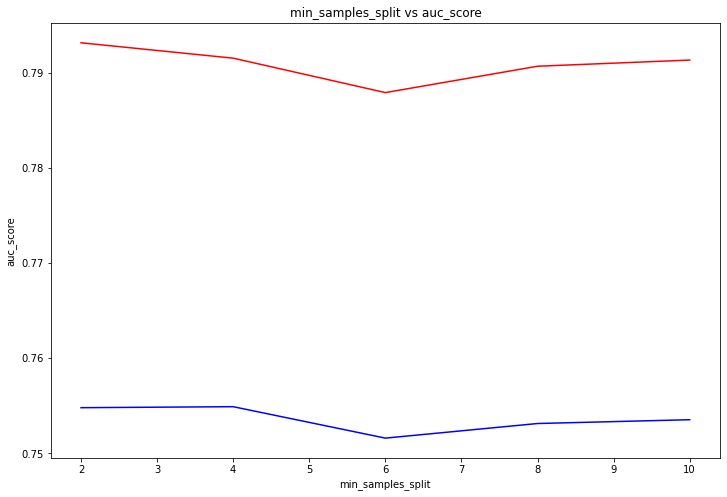

In [25]:
#RandomForest_classifier tunning
minsamplessplit = [2,4,6,8,10]
rfl_train_results = []
rfl_test_results = []
class_weights = {1:0.95,0:0.05}
for x in minsamplessplit:
    rfl_model = RandomForestClassifier(max_depth=20,max_leaf_nodes=1000,min_samples_split=x,random_state=0,class_weight=class_weights,n_jobs=-1)
    rfl_model.fit(X_train,y_train)
    rfl_xtrain_pred = rfl_model.predict(X_train)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,rfl_xtrain_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_train_results.append(auc_score)
    rfl_xtest_pred = rfl_model.predict(X_test)
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
    auc_score = auc(false_positive_rate,true_positive_rate)
    rfl_test_results.append(auc_score)
plt.plot(minsamplessplit,rfl_train_results,color="r")
plt.plot(minsamplessplit,rfl_test_results,color="b")
plt.xlabel("min_samples_split")
plt.ylabel("auc_score")
plt.title("min_samples_split vs auc_score")

In [26]:
#Random forest classifier
class_weights = {1:0.9,0:0.1}
rfl_model = RandomForestClassifier(max_depth=20,max_leaf_nodes=1000,min_samples_split=2,random_state=0,class_weight=class_weights)
rfl_model.fit(X_train,y_train)
rfl_xtrain_pred = rfl_model.predict(X_train)
rfl_xtest_pred = rfl_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,rfl_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,rfl_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,rfl_xtest_pred))

accuracy on Xtrain :-  89.54
accuracy on Xtest :-  87.72

Confusion matrix
[[64757  8242]
 [ 1973  8188]]


Random forest classifier auc score :-  84.64602709834857


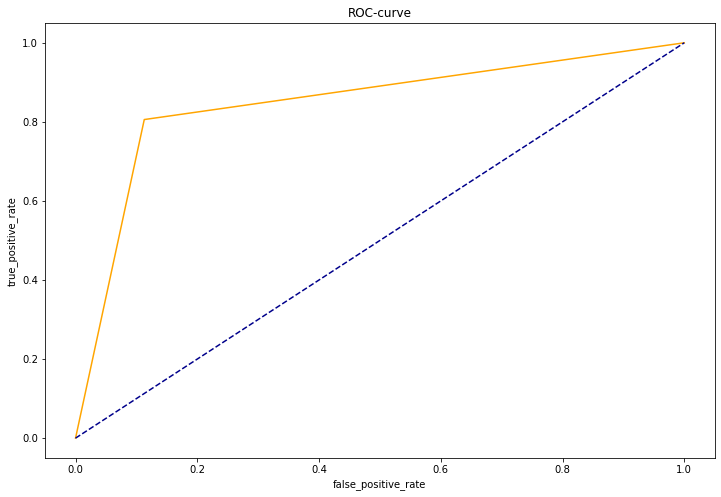

In [27]:
#Final random forest classifier auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,rfl_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Random forest classifier auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

### GradientBoost classifier

accuracy on Xtrain :-  72.4
accuracy on Xtest :-  71.21

Confusion matrix
[[52126 20873]
 [ 3071  7090]]
Gradient boost classifier classifier auc score :-  70.59152720718077


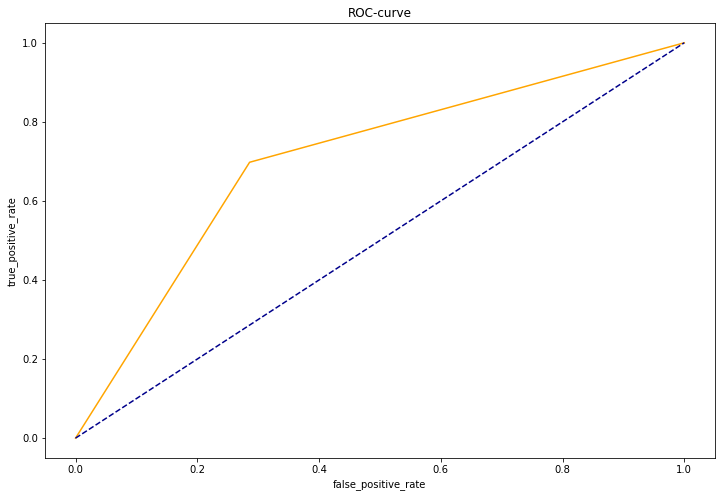

In [14]:
# Gradient boost classifier
gbc_model = GradientBoostingClassifier(random_state=0,learning_rate=0.6)
gbc_model.fit(X_train,y_train,sample_weight=compute_sample_weight("balanced", y_train))
gbc_xtrain_pred = gbc_model.predict(X_train)
gbc_xtest_pred = gbc_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,gbc_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,gbc_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,gbc_xtest_pred))

#Gradient boost Roc and auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,gbc_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Gradient boost classifier classifier auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
accuracy on Xtest :-  87.78

Confusion matrix
[[72999     0]
 [10161     0]]
Gradient boost classifier classifier auc score :-  50.0


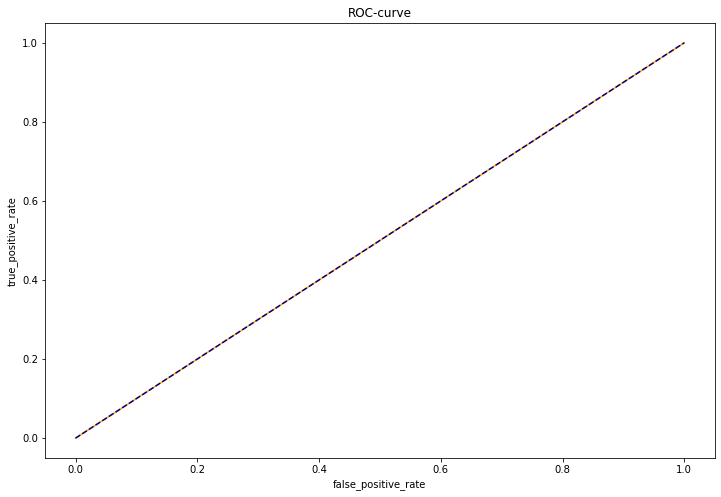

In [13]:
# hyperparameter tuning
gbc_model = GradientBoostingClassifier(random_state=0)
params = {
    "learning_rate":[0.1,0.3,0.5,0.7,0.9,1.0],
    "n_estimators":[50,100,150,200,250,300,350,400,450,500],
    "min_samples_split":list(range(2,11,2)),
    "max_depth":list(range(2,15,2)),
    "ccp_alpha":[0.1,0.2,0.4,0.6,0.8,1.0],
}
randomsearch_gb = RandomizedSearchCV(gbc_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

randomsearch_gb.fit(X_train,y_train,sample_weight=compute_sample_weight("balanced", y_train))
gbc_xtest_pred = randomsearch_gb.predict(X_test)
print("accuracy on Xtest :- ",round(accuracy_score(y_test,gbc_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,gbc_xtest_pred))

#Gradient boost Roc and auc curve
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,gbc_xtest_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print("Gradient boost classifier classifier auc score :- ",roc_auc*100)
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

### XgBoost Classifier

In [30]:
#XGBoost classifier
XGB_model = XGBClassifier(random_state=0,eta=1.0,gamma=0,n_jobs=-1)
XGB_model.fit(X_train,y_train)
XGB_xtrain_pred = XGB_model.predict(X_train)
XGB_xtest_pred = XGB_model.predict(X_test)
print("Accuracy of XGBoost classifier on x_train : ",round(accuracy_score(y_train,XGB_xtrain_pred)*100))
print("Accuracy of XGBoost classifier on x_test : ",round(accuracy_score(y_test,XGB_xtest_pred)*100))
print(" ")
print("Confusion matrix")
print(confusion_matrix(y_test,XGB_xtest_pred))
print(" ")

#XGBoost classifier roc_curve and auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,XGB_xtest_pred)
XGB_auc_score = auc(false_positive_rate,true_positive_rate)
print("XGBoost classifier auc score : ",round(XGB_auc_score*100))

Accuracy of XGBoost classifier on x_train :  91
Accuracy of XGBoost classifier on x_test :  89
 
Confusion matrix
[[68928  4071]
 [ 4943  5218]]
 
XGBoost classifier auc score :  73


In [23]:
#from sklearn.utils.class_weight import compute_sample_weight
XGB_model = XGBClassifier(random_state=0,eta=1,gamma=0.3,n_jobs=-1)
XGB_model.fit(X_train, y_train, sample_weight=compute_sample_weight("balanced", y_train))
XGB_xtrain_pred = XGB_model.predict(X_train)
XGB_xtest_pred = XGB_model.predict(X_test)
print("Accuracy of XGBoost classifier on x_train : ",round(accuracy_score(y_train,XGB_xtrain_pred)*100))
print("Accuracy of XGBoost classifier on x_test : ",round(accuracy_score(y_test,XGB_xtest_pred)*100))
print(" ")
print("Confusion matrix")
print(confusion_matrix(y_test,XGB_xtest_pred))
print(" ")

#XGBoost classifier roc_curve and auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,XGB_xtest_pred)
XGB_auc_score = auc(false_positive_rate,true_positive_rate)
print("XGBoost classifier auc score : ",round(XGB_auc_score*100))

Accuracy of XGBoost classifier on x_train :  89
Accuracy of XGBoost classifier on x_test :  87
 
Confusion matrix
[[63840  9159]
 [ 1661  8500]]
 
XGBoost classifier auc score :  86


Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGBoost classifier auc score :  85
 
accuracy :  88
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     72999
           1       0.51      0.81      0.63     10161

    accuracy                           0.88     83160
   macro avg       0.74      0.85      0.78     83160
weighted avg       0.91      0.88      0.89     83160

 
Confusion matrix


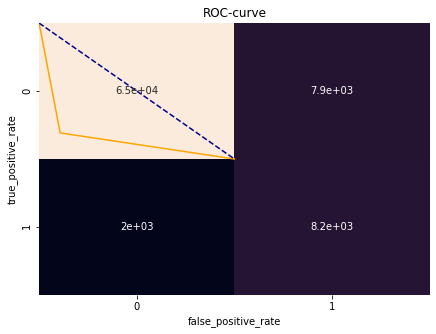

In [150]:
#XGBoost classifier hyperparameter optimization

#params
params = {
    "learning_rate":[0.1,0.3,0.5,0.7,0.9,1.0],
    "max_depth": list(range(2,16,2)),
    "min_child_weight": list(range(1,11,2)),
    "gamma":[0.1,0.3,0.5,0.7,0.9,1.0],
    "colsample_bytree": [0.1,0.3,0.5,0.7,0.9,1.0]
}

#Create model object
XGB_model = XGBClassifier(random_state=0)

#RandomizedsearchCV
random_search = RandomizedSearchCV(XGB_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train,sample_weight=compute_sample_weight("balanced", y_train))
XGB_xtest_pred = random_search.predict(X_test)
# auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,XGB_xtest_pred)
XGB_auc_score = auc(false_positive_rate,true_positive_rate)
print("XGBoost classifier auc score : ",round(XGB_auc_score*100))

#accuracy
print(" ")
print("accuracy : ",round(accuracy_score(y_test,XGB_xtest_pred)*100))

#classification report
print(" ")
print("CLASSIFICATION REPORT")
print(classification_report(y_test,XGB_xtest_pred))
print(" ")

#Confusion Matrix
plt.figure(figsize=(7,5))
print("Confusion matrix")
sns.heatmap(confusion_matrix(y_test,XGB_xtest_pred),annot=True,cbar=False)

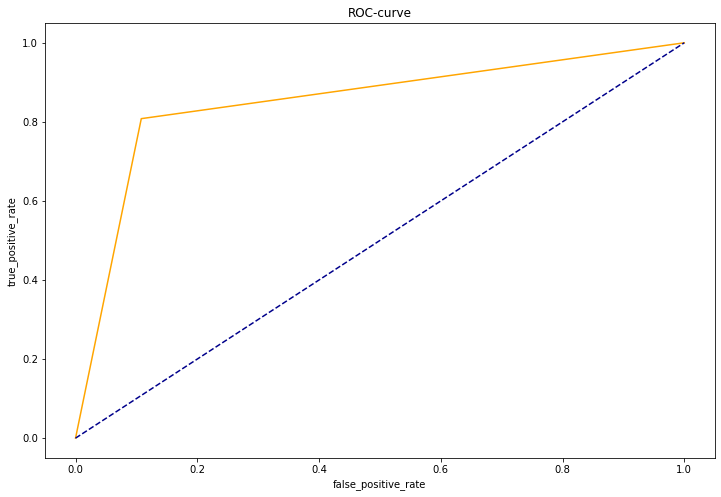

In [151]:
# roc_auc curve
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

In [35]:
# XGBoost best parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.9, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=9,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Naive Bayes classifier

In [19]:
#Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_xtest_pred = nb_model.predict(X_test)
print("Normal naive model accuracy : ",round(accuracy_score(y_test,nb_xtest_pred)*100,2))
print(" ")
print("CLASSIFICAION REPORT")
print(classification_report(y_test,nb_xtest_pred))
print(" ")
# roc and auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,nb_xtest_pred)
nb_auc_score = auc(false_positive_rate,true_positive_rate)
print("Normal naive bayes auc score : ",round(nb_auc_score*100,2))

#Confusion matrix
print(" ")
print("Confusion matrix")
print(confusion_matrix(y_test,nb_xtest_pred))

Normal naive model accuracy :  87.78
 
CLASSIFICAION REPORT
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     72999
           1       0.00      0.00      0.00     10161

    accuracy                           0.88     83160
   macro avg       0.44      0.50      0.47     83160
weighted avg       0.77      0.88      0.82     83160

 
Normal naive bayes auc score :  50.0
 
Confusion matrix
[[72999     0]
 [10161     0]]


### AdaBoost Classifier

accuracy on Xtrain :-  56.57
accuracy on Xtest :-  56.32

Confusion matrix
[[41237 31762]
 [ 4560  5601]]
 
AdaBoost auc score :  55.806171119637874


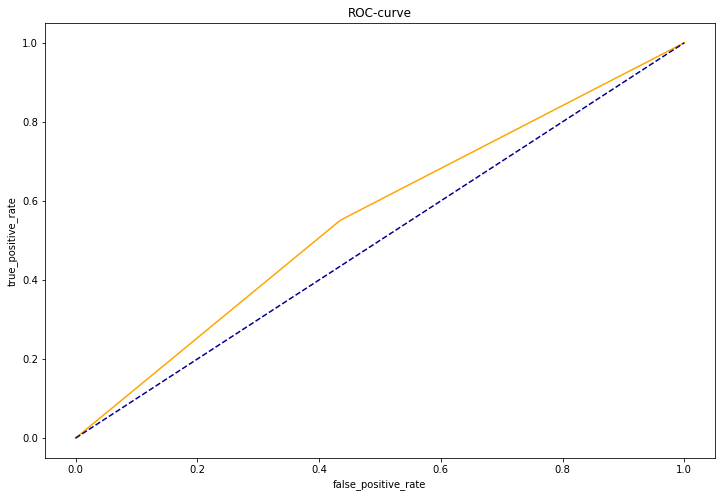

In [17]:
ada_model = AdaBoostClassifier(random_state=0,learning_rate=0.2,n_estimators=200)
ada_model.fit(X_train,y_train,sample_weight=compute_sample_weight("balanced", y_train))
ada_xtrain_pred = ada_model.predict(X_train)
ada_xtest_pred = ada_model.predict(X_test)
print("accuracy on Xtrain :- ",round(accuracy_score(y_train,ada_xtrain_pred)*100,2))
print("accuracy on Xtest :- ",round(accuracy_score(y_test,ada_xtest_pred)*100,2))
print("")
print("Confusion matrix")
print(confusion_matrix(y_test,ada_xtest_pred))

#auc score
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,ada_xtest_pred)
ada_auc_score = auc(false_positive_rate,true_positive_rate)
print(" ")
print("AdaBoost auc score : ",ada_auc_score*100)

#roc_auc curve
plot_roc_auc_curve(false_positive_rate,true_positive_rate)

### Algorithms that giving good results are as below:
#### 1. RandomForest Classifier - 84.6 % auc
#### 2. Decision Tree Classifier - 85.33 % auc
#### 3. XgBoost Classifer - 86 % auc

# Dump the model
#### Best model will be dumped in the pickle format to avoid retraining every time to get predictions

In [24]:
#Model dumping
with open("final_model",'wb') as f:
    pickle.dump(XGB_model,f)

In [128]:
#load the saved model into an object model
with open("final_model",'rb') as f:
    model = pickle.load(f)

In [143]:
# get a prediction for a random single default instance 
model_pred = model.predict(df_org[df_org["Risk_Flag"]==1].drop("Risk_Flag",axis=1).iloc[0].values.reshape(1,-1))
if model_pred==1:
    print("Applicant is default. Kindly check the documents once again.")
else:
    print("Applicant is good. Hence loan can be sanctioned.")

Applicant is default. Kindly check the documents once again


In [145]:
# get a prediction for a random single non default instance 
model_pred = model.predict(df_org[df_org["Risk_Flag"]==0].drop("Risk_Flag",axis=1).iloc[0].values.reshape(1,-1))
if model_pred==1:
    print("Applicant is default. Kindly check the documents once again.")
else:
    print("Applicant is good. Hence loan can be sanctioned.")

Applicant is good. Hence loan can be sanctioned
